  ##  TITANIC 

## Collecting the data

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [67]:
data=pd.read_csv('C:/Users/sachi/Downloads/titanic_train.csv')
data.shape

(891, 12)

In [68]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
data.drop('Cabin',axis=1,inplace=True)

In [71]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [72]:
not_zeros=['Age']
for column in not_zeros:
    data[column]=data[column].replace(0,np.NAN)
    mean=int(data[column].mean(skipna=True))
    data[column]=data[column].replace(np.NAN,mean)

In [73]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [74]:
data.fillna('S',inplace=True)

In [75]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [76]:
sex=pd.get_dummies(data['Sex'],drop_first=True)

In [77]:
pclass=pd.get_dummies(data['Pclass'],drop_first=True)

In [78]:
embarked=pd.get_dummies(data['Embarked'],drop_first=True)

In [79]:
data=pd.concat([data,sex,pclass,embarked],axis=1)

In [80]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,2,3,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [81]:
data.drop(['PassengerId','Pclass','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [82]:
data.head()

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [83]:
X=data.drop(['Survived'],axis=1)
y=data['Survived']

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

## 1)logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression


In [87]:
model=LogisticRegression()

In [88]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [89]:
y_pred=model.predict(x_test)

In [90]:
model.score(x_test,y_test)

0.7947761194029851

In [91]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [92]:
print('accuracy_score:',accuracy_score(y_pred,y_test))

accuracy_score: 0.7947761194029851


In [93]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('classification_report:',classification_report(y_pred,y_test))
print('confusion_matrix:',confusion_matrix(y_pred,y_test))
print('accuracy_score:',accuracy_score(y_pred,y_test))

classification_report:              precision    recall  f1-score   support

          0       0.88      0.81      0.85       188
          1       0.63      0.75      0.69        80

avg / total       0.81      0.79      0.80       268

confusion_matrix: [[153  35]
 [ 20  60]]
accuracy_score: 0.7947761194029851


### 2) KNN

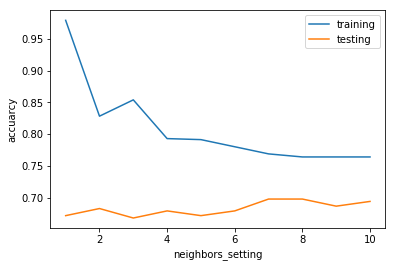

In [94]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
testing_accuracy=[]
neighbors_setting=range(1,11)
for n_neighbors in neighbors_setting:
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train)
    training_accuracy.append(knn.score(x_train,y_train))
    testing_accuracy.append(knn.score(x_test,y_test))
    
plt.plot(neighbors_setting,training_accuracy,label='training')
plt.plot(neighbors_setting,testing_accuracy,label='testing')
plt.xlabel('neighbors_setting')
plt.ylabel('accuarcy')
plt.legend()
plt.show()


In [95]:
knn=KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(x_train,y_train)
print('training:{:}'.format(knn.score(x_train,y_train)))
print("testing:{:}".format(knn.score(x_test,y_test)))

training:0.7640449438202247
testing:0.6940298507462687


## 3) SVM

In [96]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
model.score(x_test,y_test)

0.7873134328358209

In [98]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('classification_report:',classification_report(y_pred,y_test))
print('confusion_matrix:',confusion_matrix(y_pred,y_test))
print('accuracy_score:',accuracy_score(y_pred,y_test))

classification_report:              precision    recall  f1-score   support

          0       0.86      0.82      0.84       180
          1       0.66      0.72      0.69        88

avg / total       0.79      0.79      0.79       268

confusion_matrix: [[148  32]
 [ 25  63]]
accuracy_score: 0.7873134328358209


## 4) Naive Baye

In [99]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None)

In [100]:
y_pred=model.predict(x_test)
model.score(x_test,y_test)

0.7723880597014925

In [101]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('classification_report:',classification_report(y_pred,y_test))
print('confusion_matrix:',confusion_matrix(y_pred,y_test))
print('accuracy_score:',accuracy_score(y_pred,y_test))

classification_report:              precision    recall  f1-score   support

          0       0.85      0.81      0.83       182
          1       0.63      0.70      0.66        86

avg / total       0.78      0.77      0.78       268

confusion_matrix: [[147  35]
 [ 26  60]]
accuracy_score: 0.7723880597014925


## 5)RandomForest

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [104]:
y_pred=model.predict(x_test)
model.score(x_test,y_test)

0.8059701492537313

In [107]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('classification_report:',classification_report(y_pred,y_test))
print('confusion_matrix:',confusion_matrix(y_pred,y_test))
print('accuracy_score:',accuracy_score(y_pred,y_test))

classification_report:              precision    recall  f1-score   support

          0       0.90      0.82      0.86       189
          1       0.64      0.77      0.70        79

avg / total       0.82      0.81      0.81       268

confusion_matrix: [[155  34]
 [ 18  61]]
accuracy_score: 0.8059701492537313


### 1) logistic Regression-79.4%
###  2) KNN-69.4%
###  3) SVM-78.7%
###  4) Naive-bayes-77.2%
###  5) RandomForest-80.5%
    

#  According to above analyzies we have found RandoForest as the better output as 80.5%